#### Import the necessary libraries

In [87]:
#%pip install pandas numpy matplotlib seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import the dataset

In [88]:
df = pd.read_csv('nyc_housing_base.csv', sep = ',') 
df.head() 

,borough_x,block,lot,sale_price,zip_code,borough_y,yearbuilt,lotarea,bldgarea,resarea,comarea,unitsres,unitstotal,numfloors,latitude,longitude,landuse,bldgclass,building_age
0,1,400,11,280000,10009.0,MN,1900.0,2404.0,6875.0,6875.0,0.0,18.0,18.0,5.0,40.724415,-73.983891,2.0,C6,125.0
1,1,402,36,2000000,10009.0,MN,1900.0,1919.0,7810.0,6810.0,1000.0,8.0,10.0,5.0,40.724975,-73.981535,2.0,C4,125.0
2,1,402,60,3400000,10009.0,MN,1920.0,2150.0,6152.0,5352.0,800.0,8.0,9.0,5.0,40.725346,-73.983112,4.0,C7,105.0
3,1,404,42,4000000,10009.0,MN,1855.0,2369.0,6990.0,6990.0,0.0,10.0,10.0,5.0,40.727398,-73.980600,2.0,C4,170.0
4,1,372,55,655000,10009.0,MN,1920.0,5298.0,17990.0,17990.0,0.0,20.0,20.0,5.0,40.720621,-73.979534,2.0,C6,105.0


### Dataset Exploration - Raw Data

#### Understanding the dataset

In [89]:
# dataset size
rows, columns = df.shape
print("Number of rows:", rows)
print("Number of columns:", columns)

# data types
print("Dataset types:\n", df.dtypes)

Number of rows: 34439
Number of columns: 19
Dataset types:
 borough_x         int64
block             int64
lot               int64
sale_price        int64
zip_code        float64
borough_y        object
yearbuilt       float64
lotarea         float64
bldgarea        float64
resarea         float64
comarea         float64
unitsres        float64
unitstotal      float64
numfloors       float64
latitude        float64
longitude       float64
landuse         float64
bldgclass        object
building_age    float64
dtype: object


In [90]:
# summary statistics
df.describe()

,borough_x,block,lot,sale_price,zip_code,yearbuilt,lotarea,bldgarea,resarea,comarea,unitsres,unitstotal,numfloors,latitude,longitude,landuse,building_age
count,34439.000000,34439.000000,34439.000000,3.443900e+04,34423.000000,34439.000000,3.443900e+04,3.443900e+04,3.425100e+04,3.425100e+04,34439.000000,34439.000000,34396.000000,34433.000000,34433.000000,34436.000000,34439.000000
mean,3.073608,4562.694532,60.057174,1.171832e+06,10866.464370,1941.007579,5.244022e+04,6.271570e+04,5.593040e+04,6.846554e+03,51.716775,52.309765,4.227674,40.707342,-73.919829,1.943112,83.992421
std,1.287072,3611.017542,136.516558,1.241375e+06,557.770632,28.985203,5.032042e+05,2.712663e+05,2.116029e+05,6.971171e+04,173.385339,174.964326,5.230538,0.082194,0.108336,1.345451,28.985203
min,1.000000,1.000000,1.000000,1.186300e+04,10001.000000,1800.000000,1.610000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,40.500291,-74.253599,1.000000,0.000000
25%,2.000000,1432.000000,14.000000,5.125000e+05,10308.000000,1920.000000,2.090000e+03,1.614500e+03,1.356000e+03,0.000000e+00,1.000000,1.000000,2.000000,40.640011,-73.978330,1.000000,65.000000
50%,3.000000,3854.000000,33.000000,8.250000e+05,11210.000000,1935.000000,3.090000e+03,2.494000e+03,2.120000e+03,0.000000e+00,2.000000,2.000000,2.000000,40.705836,-73.915430,1.000000,90.000000
75%,4.000000,6678.000000,59.000000,1.300000e+06,11364.000000,1960.000000,7.502000e+03,1.450000e+04,9.816000e+03,0.000000e+00,13.000000,15.000000,4.000000,40.759718,-73.846150,3.000000,105.000000
max,5.000000,16350.000000,3635.000000,9.995000e+06,11697.000000,2025.000000,2.225160e+07,3.750565e+06,2.690565e+06,1.100000e+06,1887.000000,1906.000000,54.000000,40.912745,-73.700488,11.000000,225.000000


              Column  Missing_Count  Missing_Percentage
resarea      resarea            188                0.55
comarea      comarea            188                0.55
numfloors  numfloors             43                0.12
zip_code    zip_code             16                0.05
latitude    latitude              6                0.02
longitude  longitude              6                0.02
landuse      landuse              3                0.01


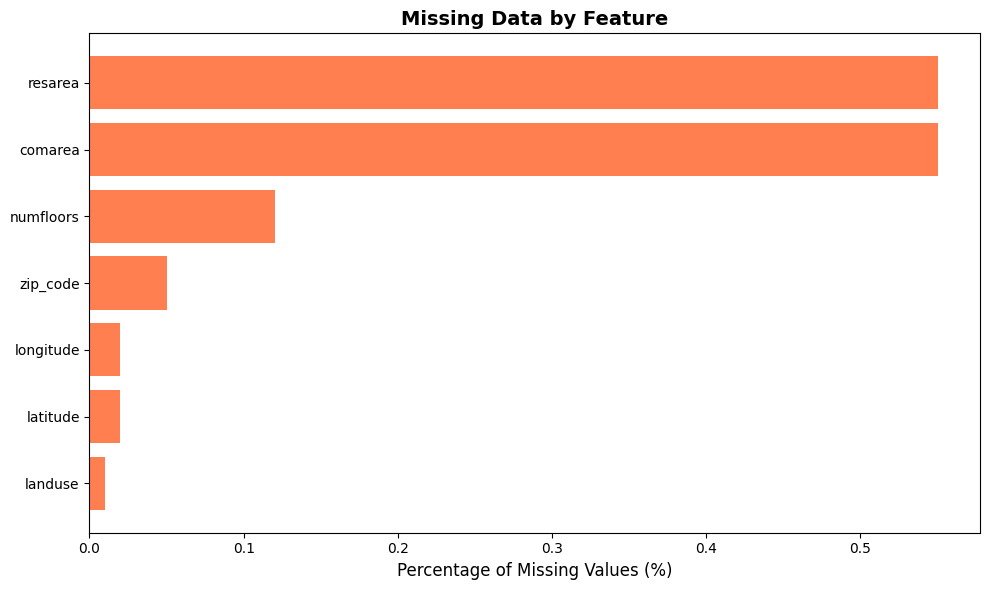

In [ ]:
# missing values analysis
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})

# filter and sort missing data, only show columns with missing values
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(missing_data)

# visualize the missing data in a bar plot
plt.figure(figsize=(10, 6))
missing_data_sorted = missing_data.sort_values('Missing_Percentage', ascending=True)
plt.barh(missing_data_sorted['Column'], missing_data_sorted['Missing_Percentage'], color='coral')
plt.xlabel('Percentage of Missing Values (%)', fontsize=12)
plt.title('Missing Data by Feature', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### Data transformation

#### Data duplication
The data in the set appeared to have 1003 duplicate rows, which after some careful analyzing was deduced that it needed to be removed from the dataset before the set can be used (to prevent overfitting).

In [92]:
#checking for duplicates
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

# display duplicate rows
df[df.duplicated(keep=False)].head()

# analyze duplicate rows, group by relevant columns
df[df.duplicated(keep=False)] \
  .groupby(['borough_x', 'block', 'lot', 'sale_price']) \
  .size() \
  .sort_values(ascending=False) \
  .head()

# remove duplicates
df = df.drop_duplicates()

# verify all duplicates have been removed
df.duplicated().sum()

# final dataset size
print("Number of rows after removing duplicates:", df.shape[0])


Number of duplicate rows: 1003
Number of rows after removing duplicates: 33436


#### Clean missing values

##### zipcode column

In [93]:
# fill missing zip_code values with the most common (mode) zip_code in the same borough
df[df['zip_code'].isna()]
df['zip_code'] = df.groupby('borough_x')['zip_code']\
                    .transform(lambda x: x.fillna(x.mode()[0]))

# check if there are still missing values
df["zip_code"].isna().sum()

np.int64(0)

##### resarea & comarea columns

In [94]:
# impute missing values for resarea and comarea with 0
# assuming that missing values indicate no residential or commercial area
df['resarea'] = df['resarea'].fillna(0)
df['comarea'] = df['comarea'].fillna(0)

# check if there are still missing values
df[['resarea', 'comarea']].isna().sum()


resarea    0
comarea    0
dtype: int64

##### numfloors column

In [95]:
# impute missing values for numfloors with the median number of floors within the same building class
# if building class is also missing -> use overall median
df[df['numfloors'].isna()]
df['numfloors'] = (
    df.groupby('bldgclass')['numfloors']
      .transform(lambda x: x.fillna(x.median()))
      .fillna(df['numfloors'].median())
)

# check if there are still missing values
df['numfloors'].isna().sum()


c:\Users\celin\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


np.int64(0)

##### longitude & latitude columns

In [96]:
# impute missing values for longitude with the median longitude within the same borough
# if borough is also missing -> use overall median
df[df["longitude"].isna()]
df['longitude'] = df.groupby('borough_x')['longitude']\
                    .transform(lambda x: x.fillna(x.median()))

# impute missing values for latitude with the median latitude within the same borough
# if borough is also missing -> use overall median
df[df["latitude"].isna()]
df["latitude"] = df.groupby("borough_x")["latitude"]\
                   .transform(lambda x: x.fillna(x.median()))

# check if there are still missing values
df[['longitude', 'latitude']].isna().sum()

longitude    0
latitude     0
dtype: int64

##### landuse column

In [97]:
# impute missing landuse values - based on resarea and comarea columns
df[df["landuse"].isna()]

# when resare > 0 and comarea = 0 -> impute as 'Residential'
df['landuse'] = np.where(
    df['landuse'].isna() & (df['resarea'] > 0) & (df['comarea'] == 0),
    'Residential',
    df['landuse']
)

# when resarea = 0 and comarea > 0 -> impute as 'Commercial'
df['landuse'] = np.where(
    df['landuse'].isna() & (df['resarea'] == 0) & (df['comarea'] > 0),
    'Commercial',
    df['landuse']
)

# when resarea > 0 and comarea > 0 -> impute as 'Mixed Use'
df['landuse'] = np.where(
    df['landuse'].isna() & (df['resarea'] > 0) & (df['comarea'] > 0),
    'Mixed Use',
    df['landuse']
)

# check remaining missing landuse values
df["landuse"].isna().sum()


np.int64(0)

#### check missing values again

In [98]:
# check missing values
print(df.isnull().sum())

borough_x       0
block           0
lot             0
sale_price      0
zip_code        0
borough_y       0
yearbuilt       0
lotarea         0
bldgarea        0
resarea         0
comarea         0
unitsres        0
unitstotal      0
numfloors       0
latitude        0
longitude       0
landuse         0
bldgclass       0
building_age    0
dtype: int64
